## Clustering Time Series : Analysis of Housing Prices in Bexar County, Texas
### Objective:
The objective of this project is to cluster housing zipcodes in Bexar County, TX based on the house prices and gain insight into the housing market in Bexar County.

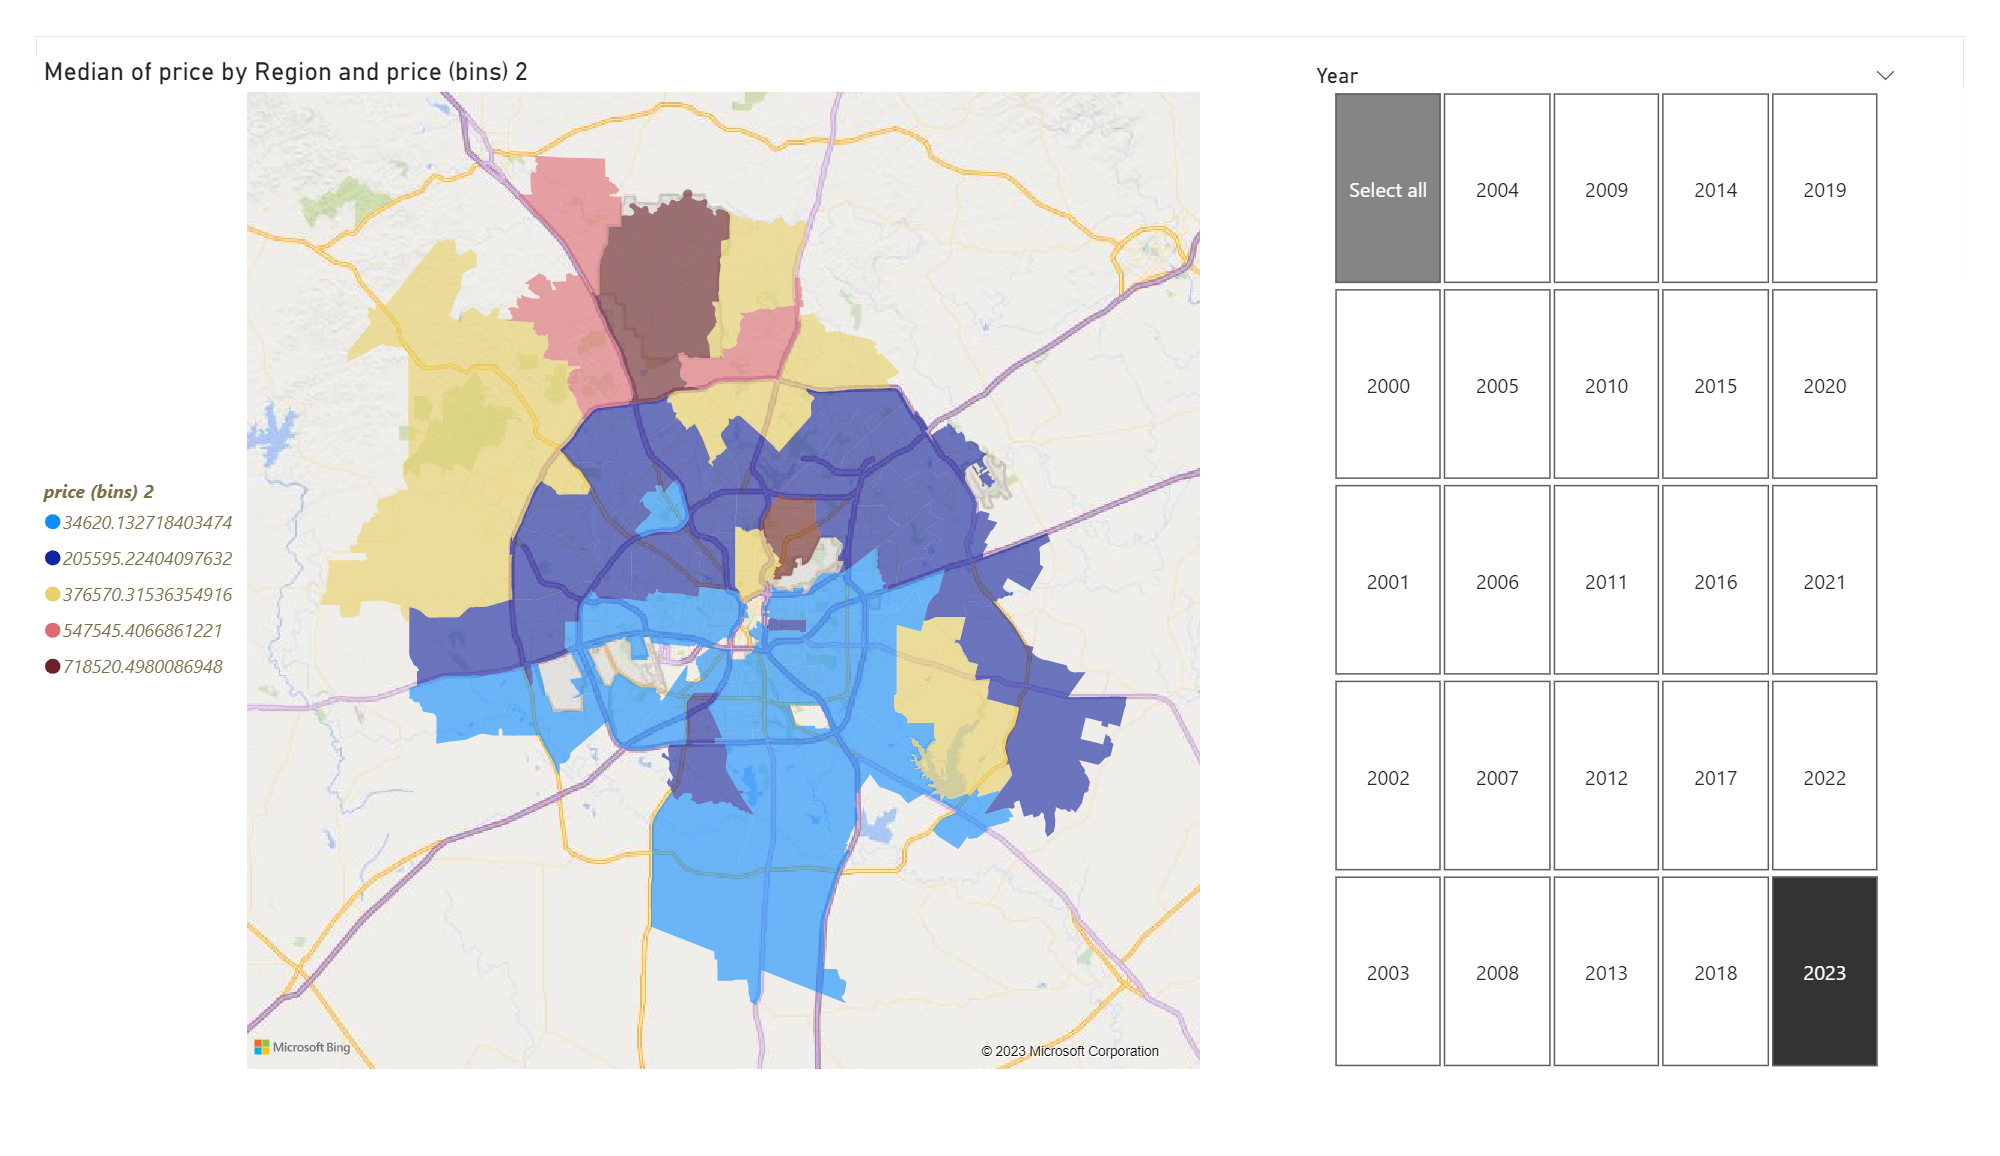

In [57]:
# importing libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import glob,re
rcParams['figure.figsize'] = (20, 10)
sns.set_context('poster')
import warnings
warnings.filterwarnings('ignore')

In [58]:
files = glob.glob('Zip_zhvi_bdrmcnt_*')
dfs = []
for file in files:
    df = pd.read_csv(file)
    df['rooms'] = file
    
    dfs.append(df)
all_rooms = pd.concat(dfs, ignore_index=True)
# create a feature for the bedroom numbers
all_rooms['rooms']=all_rooms['rooms'].apply(lambda x:re.findall('\d+',x)[0])
all_rooms.shape

(66619, 290)

(226, 290)


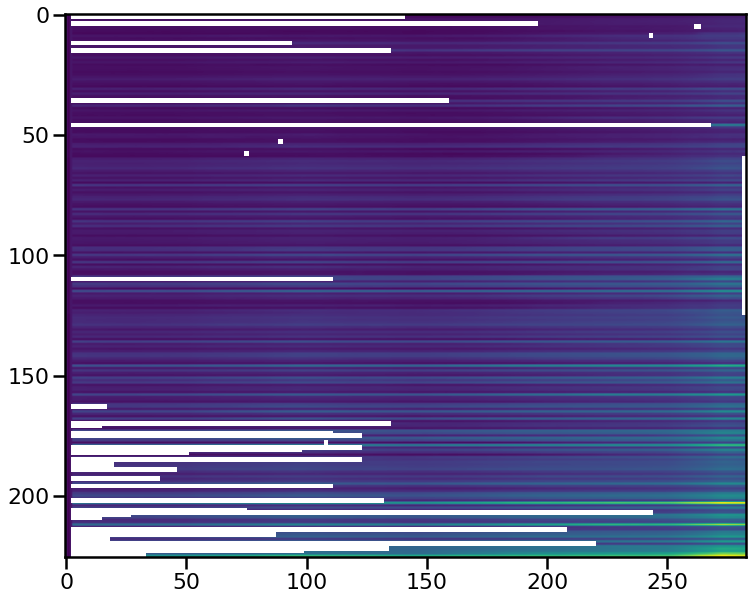

In [59]:
# extracting Bexar County ! if you wanna change the county you do that herer. 
df_all=all_rooms[all_rooms['CountyName']=='Bexar County']
print(df_all.shape)
# plot nan values 
import matplotlib
current_cmap = matplotlib.cm.get_cmap()
current_cmap.set_bad(color='red')
plt.imshow(df_all.select_dtypes('number'))

In [60]:
# drop unncessary features and featues with nan values 
df_all.drop(['RegionType','SizeRank','State'],axis=1,inplace=True)
df_all.dropna(inplace=True)

In [61]:
# check nan values
print(df_all.shape)
#df_all[['rooms','RegionName']].groupby('RegionName').value_counts().unstack()
df_all

(122, 287)


RegionID  RegionName StateName             City  \
901       92312       78216        TX      San Antonio   
902       92326       78230        TX      San Antonio   
1640      92325       78229        TX      San Antonio   
1809      92313       78217        TX      San Antonio   
2240      92308       78212        TX      San Antonio   
...         ...         ...       ...              ...   
61561     92308       78212        TX      San Antonio   
61873     92334       78238        TX      San Antonio   
63094     92205       78015        TX  Fair Oaks Ranch   
64958     92344       78248        TX      San Antonio   
65176     92327       78231        TX      San Antonio   

                               Metro    CountyName     2000-01-31  \
901    San Antonio-New Braunfels, TX  Bexar County   62085.195246   
902    San Antonio-New Braunfels, TX  Bexar County   54817.992333   
1640   San Antonio-New Braunfels, TX  Bexar County   48017.396026   
1809   San Antonio-New Braunfels, TX  Bexar County   44570.171327   
2240   San Antonio-New Braunfels, TX  Bexar County   30659.561266   
...                              ...           ...            ...   
61561  San Antonio-New Braunfels, TX  Bexar County  454219.127489   
61873  San Antonio-New Braunfels, TX  Bexar County  125563.722853   
63094  San Antonio-New Braunfels, TX  Bexar County  293781.657545   
64958  San Antonio-New Braunfels, TX  Bexar County  339931.613151   
65176  San Antonio-New Braunfels, TX  Bexar County  374548.555533   

          2000-02-29     2000-03-31     2000-04-30  ...    2022-08-31  \
901     62356.216894   62410.829625   62589.162337  ...  1.345472e+05   
902     54861.250992   54792.562091   54720.580432  ...  1.410084e+05   
1640    47980.770683   47879.792099   47692.288290  ...  1.241028e+05   
1809    44590.266069   44384.224055   43978.546138  ...  1.049103e+05   
2240    30571.128660   30587.923740   30538.545980  ...  1.955390e+05   
...              ...            ...            ...  ...           ...   
61561  456764.992784  457904.017243  458991.451449  ...  1.110855e+06   
61873  126024.301042  126444.604794  127127.945980  ...  3.258936e+05   
63094  293353.691987  293292.366448  293683.091265  ...  6.960434e+05   
64958  340512.076753  340847.588279  341665.476753  ...  6.802502e+05   
65176  375472.651534  376189.478924  377830.790871  ...  1.023155e+06   

         2022-09-30    2022-10-31    2022-11-30    2022-12-31    2023-01-31  \
901    1.346659e+05  1.347640e+05  1.352150e+05  1.357935e+05  1.375298e+05   
902    1.408251e+05  1.407225e+05  1.409890e+05  1.414520e+05  1.421657e+05   
1640   1.242133e+05  1.243731e+05  1.249630e+05  1.256348e+05  1.267210e+05   
1809   1.048433e+05  1.048130e+05  1.052872e+05  1.059993e+05  1.086066e+05   
2240   1.948788e+05  1.945435e+05  1.944929e+05  1.940901e+05  1.957914e+05   
...             ...           ...           ...           ...           ...   
61561  1.099678e+06  1.089690e+06  1.081487e+06  1.075555e+06  1.068021e+06   
61873  3.259954e+05  3.259535e+05  3.256432e+05  3.246937e+05  3.231536e+05   
63094  6.938116e+05  6.920027e+05  6.915282e+05  6.903365e+05  6.861017e+05   
64958  6.790822e+05  6.780661e+05  6.772067e+05  6.763486e+05  6.744183e+05   
65176  1.017301e+06  1.011653e+06  1.008809e+06  1.007969e+06  1.002111e+06   

         2023-02-28    2023-03-31    2023-04-30  rooms  
901    1.392482e+05  1.412842e+05  1.422954e+05      1  
902    1.428645e+05  1.437478e+05  1.439671e+05      1  
1640   1.274767e+05  1.281005e+05  1.279333e+05      1  
1809   1.113770e+05  1.146091e+05  1.157965e+05      1  
2240   1.982579e+05  2.021548e+05  2.057681e+05      1  
...             ...           ...           ...    ...  
61561  1.063080e+06  1.062003e+06  1.064702e+06      5  
61873  3.220815e+05  3.223506e+05  3.231920e+05      5  
63094  6.825373e+05  6.816523e+05  6.849907e+05      5  
64958  6.739205e+05  6.755477e+05  6.798237e+05      5  
65176  9.989420e+05  1.00130

In [62]:
# set the index to be multi index of the region and romms number 
bexar_all_rooms=df_all.set_index(['RegionName','rooms']).iloc[:,5:]



In [63]:
# set up date index 
date_col=df_all.iloc[:,6:].columns.tolist()

In [64]:
#houses with median housing size in  the Bexar county cities 
all_city=pd.pivot_table(data=df_all,values=date_col,columns=['RegionName','CountyName','StateName'],aggfunc='median')
all_city.index=pd.to_datetime(all_city.index)
print(all_city.isna().sum().sum())
all_city_TX=all_city.dropna(axis=1)
all_city_TX.isna().sum()

0


RegionName  CountyName    StateName
78015       Bexar County  TX           0
78023       Bexar County  TX           0
78101       Bexar County  TX           0
78109       Bexar County  TX           0
78148       Bexar County  TX           0
78201       Bexar County  TX           0
78202       Bexar County  TX           0
78203       Bexar County  TX           0
78207       Bexar County  TX           0
78208       Bexar County  TX           0
78209       Bexar County  TX           0
78210       Bexar County  TX           0
78211       Bexar County  TX           0
78212       Bexar County  TX           0
78213       Bexar County  TX           0
78214       Bexar County  TX           0
78216       Bexar County  TX           0
78217       Bexar County  TX           0
78218       Bexar County  TX           0
78219       Bexar County  TX           0
78220       Bexar County  TX           0
78221       Bexar County  TX           0
78222       Bexar County  TX           0
78223       Bexar Cou

In [65]:
#all_city_TX.head()

In [66]:
# reduce the columns name to Region only and save it as csv 
region_names=all_city_TX.columns.get_level_values('RegionName').tolist()
all_city_TX.columns=region_names
#all_city_TX.head()
#all_city_TX.to_csv('bexar_county_all.csv')


Text(0, 0.5, 'Price')

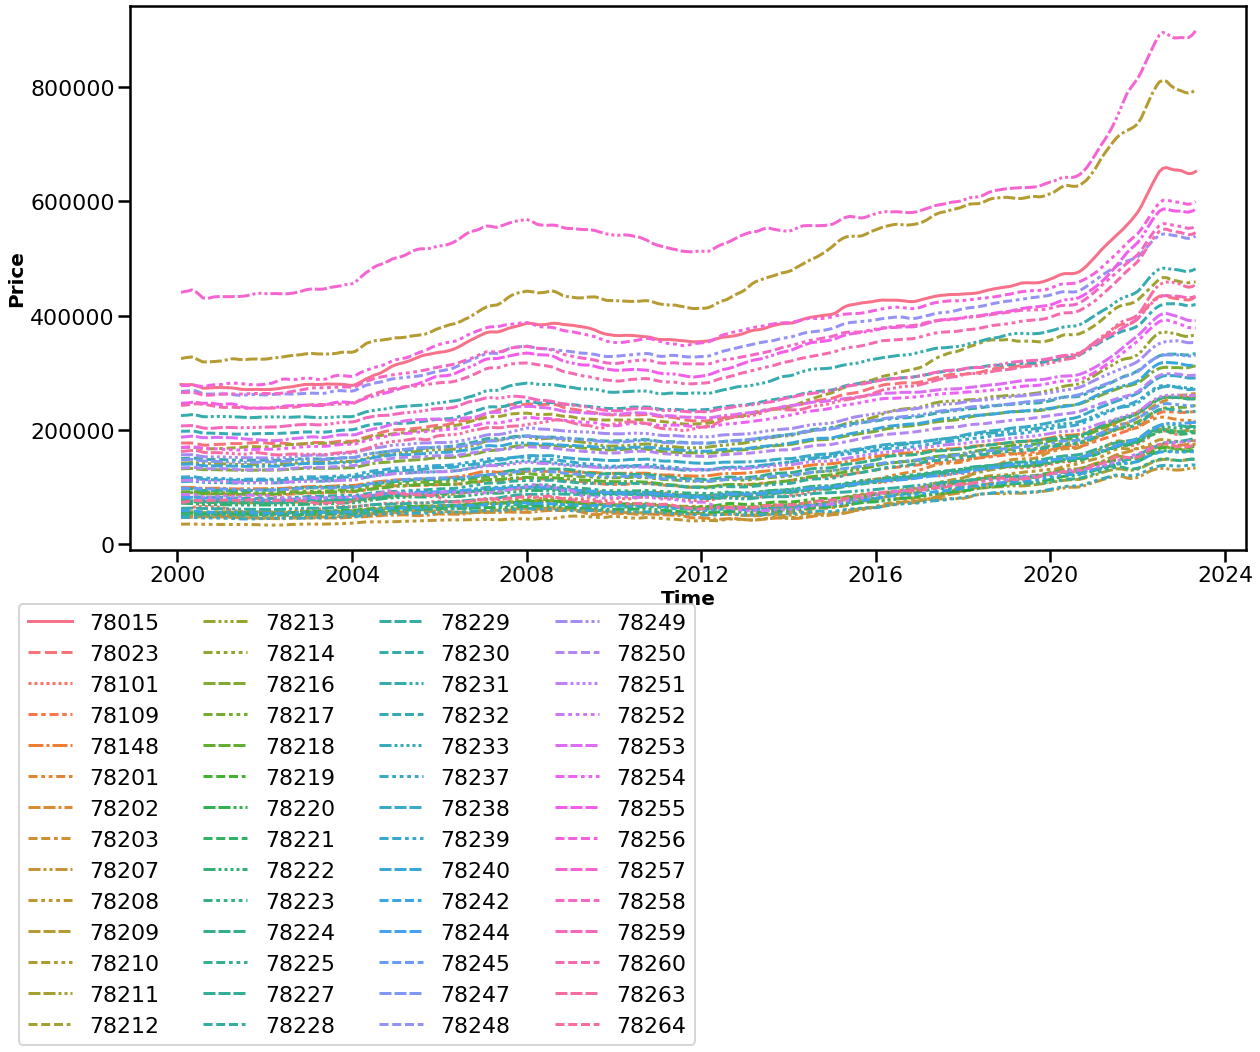

In [67]:
# plots
fig,ax=plt.subplots(1,1,figsize=(20,10))
sns.lineplot(data=all_city_TX,ax=ax)
ax.legend(bbox_to_anchor=(-0.1, -0.1),loc='upper left',borderaxespad=0,ncol=4)
ax.set_xlabel('Time',fontsize=20, fontweight="bold")
ax.set_ylabel('Price',fontsize=20, fontweight="bold")

Text(0, 0.5, 'Price')

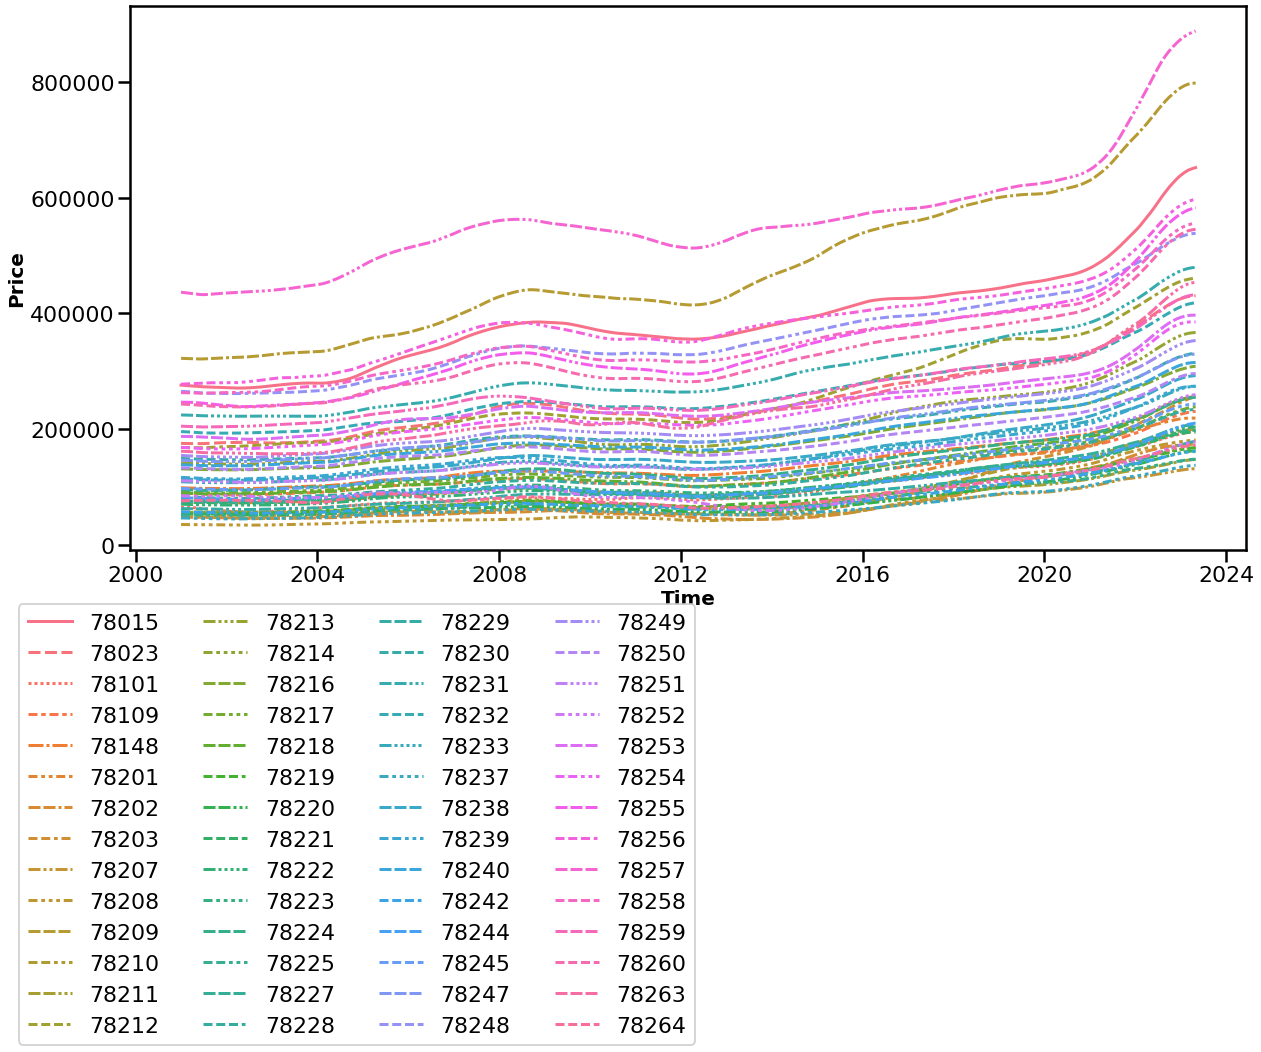

In [68]:
# moveing averag for 1 year
fig,ax=plt.subplots(1,1,figsize=(20,10))
sns.lineplot(data=all_city_TX.rolling(window=12).mean(),ax=ax)
ax.legend(bbox_to_anchor=(-0.1, -0.1),loc='upper left',borderaxespad=0,ncol=4)
ax.set_xlabel('Time',fontsize=20, fontweight="bold")
ax.set_ylabel('Price',fontsize=20, fontweight="bold")

In [69]:
# the growth rate of the housing in Bexar county over the two decates 
def calculate_growth_rate(start_prices, end_prices):
    if isinstance(start_prices, pd.DataFrame):
        start_prices = start_prices.values
    if isinstance(end_prices, pd.DataFrame):
        end_prices = end_prices.values
    growth_rates = ((end_prices - start_prices) / start_prices) * 100
    return growth_rates
gr=pd.DataFrame(calculate_growth_rate(all_city_TX.iloc[1,:],all_city_TX.iloc[-1,:]),columns=['GR'])
gr

GR
78015  133.469678
78023  144.040073
78101  249.770653
78109  155.603644
78148  159.241514
78201  186.221030
78202  270.170755
78203  409.666336
78207  170.983837
78208  408.509859
78209  143.552375
78210  246.022446
78211  160.250841
78212  170.402813
78213  156.937840
78214  189.958821
78216  135.673095
78217  163.965541
78218  182.529880
78219  202.365669
78220  201.823869
78221  159.993570
78222  187.594394
78223  154.029801
78224  160.981964
78225  185.378958
78227  167.543363
78228  178.688317
78229  192.831889
78230  121.937892
78231  113.453032
78232  111.944546
78233  147.844349
78237  194.074963
78238  153.428685
78239  130.158317
78240  123.443943
78242  173.684995
78244  159.307393
78245  145.816124
78247  123.110716
78248  101.167971
78249  125.547442
78250  120.880961
78251  133.016465
78252  107.502979
78253  108.222028
78254  122.678939
78255  136.980375
78256  115.891999
78257  103.028692
78258  109.108314
78259  109.169998
78260  123.762008
78263  178.327528
78264  133.763747

<AxesSubplot: >

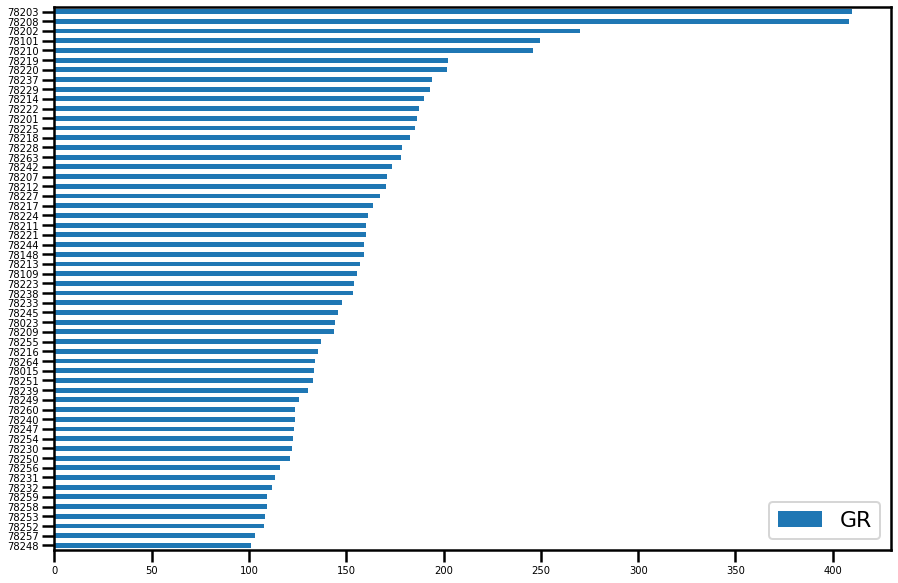

In [70]:
#sns.barplot(y=gr.index,x=gr['GR'],order=gr.sort_values(by='GR',ascending=False).index.tolist(),palette = 'hls')
#ax.set_title('Growth Rate 1996-2020',fontsize=25)
gr.sort_values(by='GR',ascending=True).plot.barh(figsize=(15,10),fontsize=10)

In [71]:
# convert the index to only year for ploting
yearly_price=all_city_TX.resample('Y').mean().dropna()
yearly_price.index=yearly_price.index.strftime('%Y')#.pct_change(axis=0).T*100


Text(0.5, 1.0, 'Annual Growth Rate')

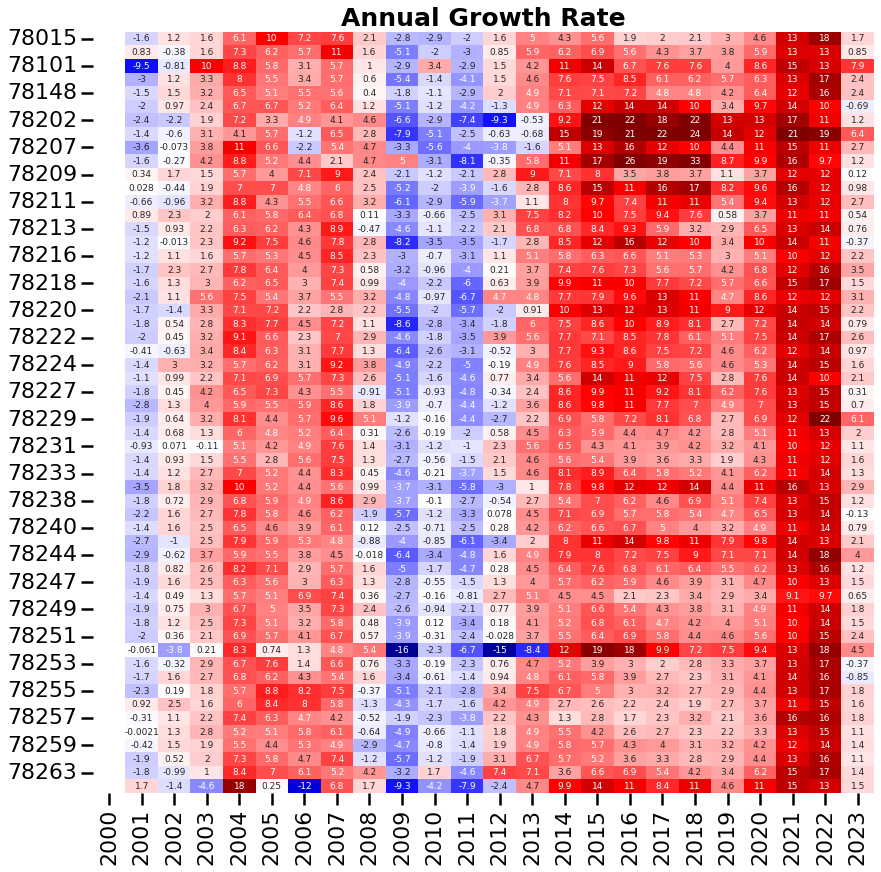

In [107]:
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(ax=ax,data=yearly_price.pct_change(axis=0).mul(100).T,annot_kws={'fontsize':9},
            square=False,cmap='seismic',annot=True,vmin=-20,vmax=+20,cbar=False)

ax.set_title('Annual Growth Rate',fontsize=25, fontweight="bold")


Index(['2009', '2010', '2011'], dtype='object')


Text(0.5, 1.0, 'Sum of the Annual Growth Rate 2008-2010')

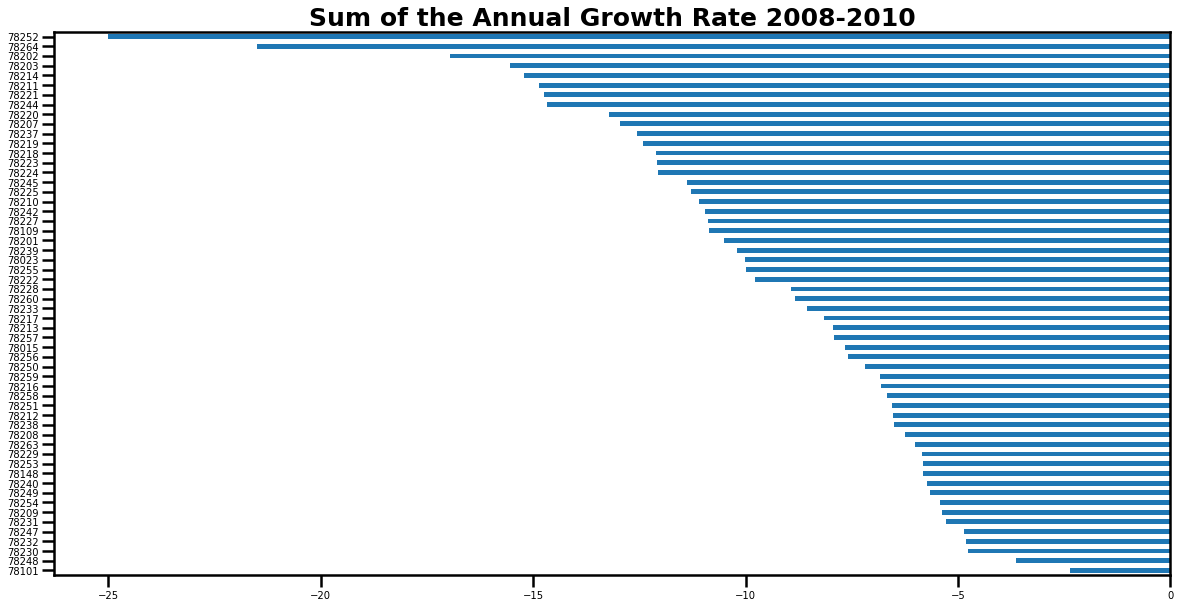

In [73]:
print(yearly_price.pct_change(axis=0).mul(100)[9:12].index);
ax=yearly_price.pct_change(axis=0).mul(100)[9:12].sum().sort_values(ascending=False).plot.barh(fontsize=10);
ax.set_title('Sum of the Annual Growth Rate 2008-2010',fontsize=25, fontweight="bold")

# Introduction to Dynamic Time Warping with simple example 

In [74]:
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

def dtw(x_norm, y_norm, dist='euclidean'):
    """
    Dynamic Time Warping algorithm.
    :param x: Numpy array containing the first sequence.
    :param y: Numpy array containing the second sequence.
    :param dist: Distance function used to compare the elements of the sequences.
    :return: The minimum distance between the two sequences, the DTW matrix and the warp path.
    """
    D = cdist(x_norm.reshape(-1, 1), y_norm.reshape(-1, 1), dist)
    n = len(x_norm)
    m = len(y_norm)
    DTW = np.zeros((n + 1, m + 1))
    DTW[1:, 0] = np.inf
    DTW[0, 1:] = np.inf

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = D[i - 1, j - 1]
            DTW[i, j] = cost + np.min([DTW[i - 1, j], DTW[i, j - 1], DTW[i - 1, j - 1]])

    # Compute the warp path
    i, j = n, m
    path = [(i, j)]
    while i > 1 or j > 1:
        if i == 1:
            j -= 1
        elif j == 1:
            i -= 1
        else:
            prev = np.argmin([DTW[i - 1, j], DTW[i, j - 1], DTW[i - 1, j - 1]])
            if prev == 0:
                i -= 1
            elif prev == 1:
                j -= 1
            else:
                i -= 1
                j -= 1
        path.append((i, j))

    path.append((0, 0))

    return DTW[n, m], DTW, path


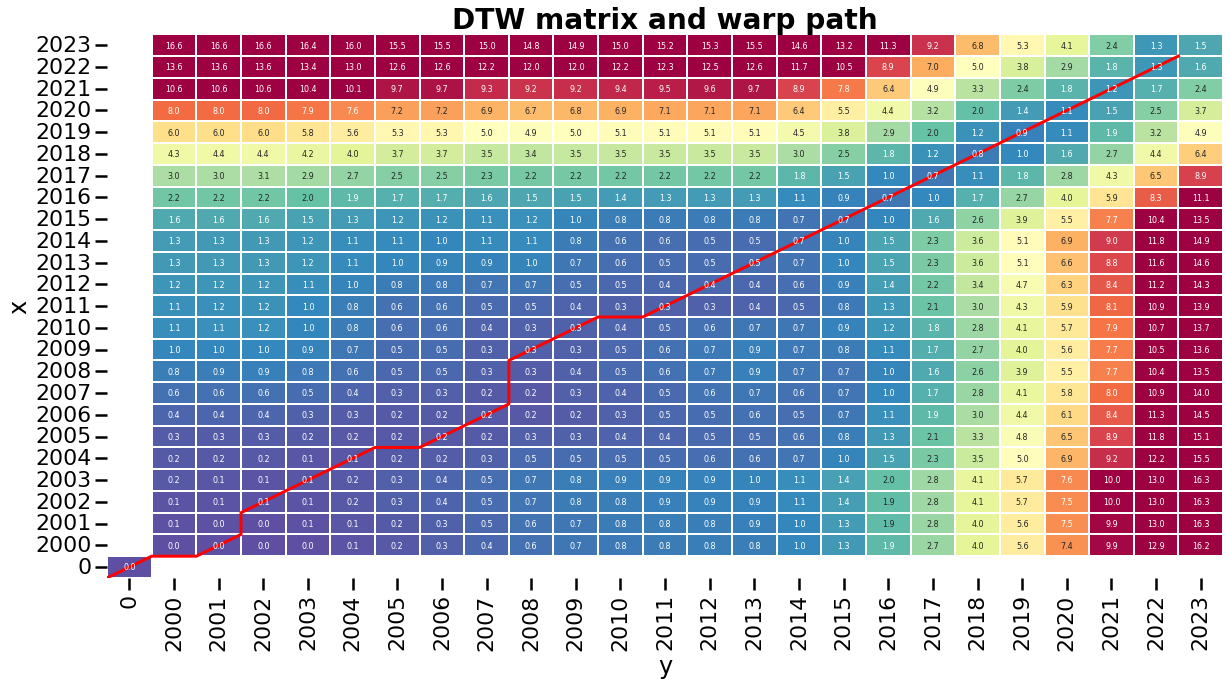

The DTW distance between x and y is 1.535384114705793


In [75]:
# example
move_ave=all_city_TX.resample('Y').mean().dropna()
time=move_ave.index.year
x1 = move_ave[78202].values
y1 = move_ave[78203].values

x= (x1 - np.mean(x1)) / np.std(x1)
y = (y1 - np.mean(y1)) / np.std(y1)

dtw_distance, dtw_matrix, warp_path = dtw(x, y, dist='euclidean')
###

years=[0]
years.extend(move_ave.index.year.tolist())
ax=sns.heatmap(dtw_matrix, linewidths=0.005,cbar=False ,
               xticklabels=years,cmap='Spectral_r', annot=True, yticklabels=years,
               fmt='.1f',annot_kws={'fontsize':8},vmin=0,vmax=10,)
ax.invert_yaxis()
ax.plot([j for (i, j) in warp_path], [i for (i, j) in warp_path], color='red')
ax.set_xlabel('y')
ax.set_ylabel('x')
ax.set_title('DTW matrix and warp path', fontsize=28, fontweight="bold")
#ax.axis("off")
ax.autoscale(False)
#ax.set_aspect ("equal") 
plt.xticks(rotation=90)

plt.show()

print(f"The DTW distance between x and y is {dtw_distance}")


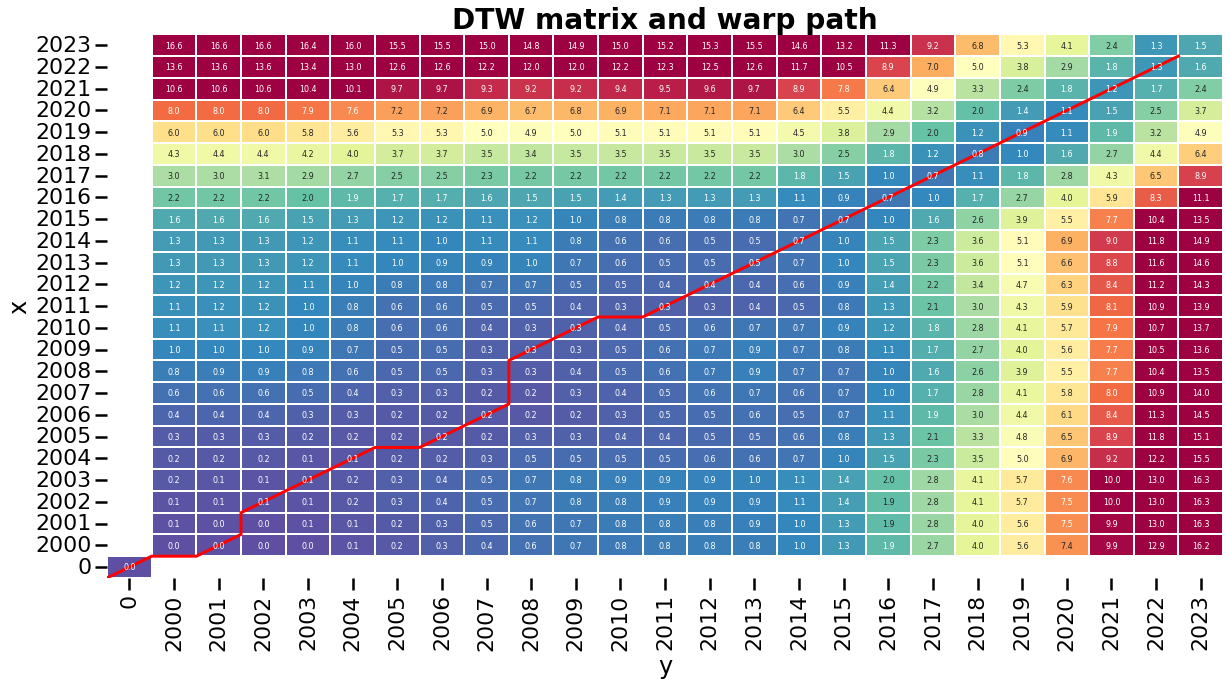

The DTW distance between x and y is 1.535384114705793


In [76]:

x= (x1 - np.mean(x1)) / np.std(x1)
y = (y1 - np.mean(y1)) / np.std(y1)

dtw_distance, dtw_matrix, warp_path = dtw(x, y, dist='euclidean')
###

years=[0]
years.extend(move_ave.index.year.tolist())
ax=sns.heatmap(dtw_matrix, linewidths=0.005,cbar=False ,
               xticklabels=years,cmap='Spectral_r', annot=True, yticklabels=years,
               fmt='.1f',annot_kws={'fontsize':8},vmin=0,vmax=10,)
ax.invert_yaxis()
ax.plot([j for (i, j) in warp_path], [i for (i, j) in warp_path], color='red')
ax.set_xlabel('y')
ax.set_ylabel('x')
ax.set_title('DTW matrix and warp path', fontsize=28, fontweight="bold")
#ax.axis("off")
ax.autoscale(False)
#ax.set_aspect ("equal") 
plt.xticks(rotation=90)

plt.show()

print(f"The DTW distance between x and y is {dtw_distance}")


In [ ]:
def calc_euclidean(x, y):
    return np.sqrt(np.sum((x - y) ** 2))
euclidean_distance= calc_euclidean(x.reshape(-1,1),y.reshape(-1,1))


fig, ax = plt.subplots(figsize=(14, 10))
xx = [(i, x[i]) for i in np.arange(0, len(x))]
yy = [(j, y[j]) for j in np.arange(0, len(y))]

for i, j in zip(xx, yy):
    ax.plot([i[0], j[0]], [i[1], j[1]], '--k', linewidth=4)


ax.plot(x, '-ro', label='x', linewidth=4, markersize=10, markerfacecolor='red')
ax.plot(y, '-bo', label='y', linewidth=4, markersize=10, markerfacecolor='blue')
ax.set_xlabel('Time',fontsize=20, fontweight="bold")
ax.set_ylabel('Value',fontsize=20, fontweight="bold")
ax.set_title("Euclidean Distance", fontsize=28, fontweight="bold")
ax.set_xticklabels([0,1996, 2001, 2006, 2011, 2016,2020,2025],fontsize=20)
ax.text(1, 2, f"The euclidean distance= {np.round(euclidean_distance,2)}", fontsize=14)
#fig.savefig("ex1_euclidean_distance.png", **savefig_options)

# Clustering time series 

In [78]:
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
seed = 0


In [79]:
import numpy as np
from tslearn.metrics import dtw,  cdist_dtw
from tslearn.clustering import silhouette_score


## Finding how many clusters using Elbow method

In [80]:
def elbow_method(X, max_k,metric='dtw'):
    """
    Performs the Elbow Method for determining the optimal number of clusters in k-means clustering.

    Parameters:
        -- X: numpy array or pandas DataFrame
            The input data for clustering.
        -- max_k: int
            The maximum number of clusters to consider.

    Returns:
        -- k_optimal: int
            The optimal number of clusters determined by the Elbow Method.
        -- inertia: list
            The list of inertia values for each number of clusters.
    """
    # Initialize lists to store the inertia values
    inertia = []

    # Loop through the range of cluster numbers
    for k in range(1, max_k+1):
        # Initialize and fit k-means clustering model
        kmeans = TimeSeriesKMeans(n_clusters=k,metric=metric, max_iter=10,n_jobs=10,
                         verbose=False,
                            random_state=42)
        kmeans.fit(X)
        # Append the inertia value to the list
        inertia.append(kmeans.inertia_)

    # Plot the inertia values
    plt.plot(range(1, max_k+1), inertia, 'bo-')


    # Calculate the silhouette score for each number of clusters
    silhouette_scores = [silhouette_score(X, TimeSeriesKMeans(n_clusters=k,metric=metric, max_iter=10,n_jobs=10,
                         verbose=False,
                            random_state=42).fit_predict(X)) for k in range(2, max_k+1)]

    # Find the optimal number of clusters based on the maximum silhouette score
    k_optimal = np.argmax(silhouette_scores) + 2
    #plt.axvline(x=k_optimal, color='r', linestyle='--')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

    return (f'Silhouette score shows k= {k_optimal}')


In [81]:
def plot_time_series_clusters(train_data, n_clusters,metric='dtw'):
    """
    Performs time series clustering using TimeSeriesKMeans from tslearn package and
    plots the time series data for each cluster.

    Parameters:
        -- train_data: numpy array or pandas DataFrame
            The time series data to cluster.
        -- n_clusters: int
            The number of clusters to form.
        -- sz: int, optional (default=0)
            The length of the time series data.

    Returns:
        y_pred
    """
    # Initialize TimeSeriesKMeans model
    euc_km = TimeSeriesKMeans(n_clusters=n_clusters,metric=metric, verbose=True, random_state=42)

    # Fit and predict clusters on the time series data
    y_pred = euc_km.fit_predict(train_data)
    
       
    # Plot time series data for each cluster
    for yi in range(n_clusters):
        plt.subplot(3, 3, 1 + yi)
        for xx in train_data[y_pred == yi]:
            plt.plot(xx.ravel(), "k-", alpha=.2)
        plt.plot(euc_km.cluster_centers_[yi].ravel(), "r-")
        plt.xlim(0, sz)
        plt.text(0.55, 0.85, 'Cluster %d' % (yi + 1), transform=plt.gca().transAxes)
        if yi == 1:
            plt.title("Euclidean $k$-means")

    plt.tight_layout()
    plt.show()
    return y_pred


In [82]:
# resample the time seriese per year 
annual_average=all_city_TX.resample('Y').mean()


In [83]:
# using moveing average data output for clustering. 
real_price_data=annual_average.T.copy()
input_data=annual_average.diff().dropna().T.copy()
norm_input_data = TimeSeriesScalerMeanVariance(std=1).fit_transform(input_data)# remving the mean of the data. 
sz = norm_input_data.shape[1]
print(norm_input_data.shape,norm_input_data.shape)


(56, 23, 1) (56, 23, 1)


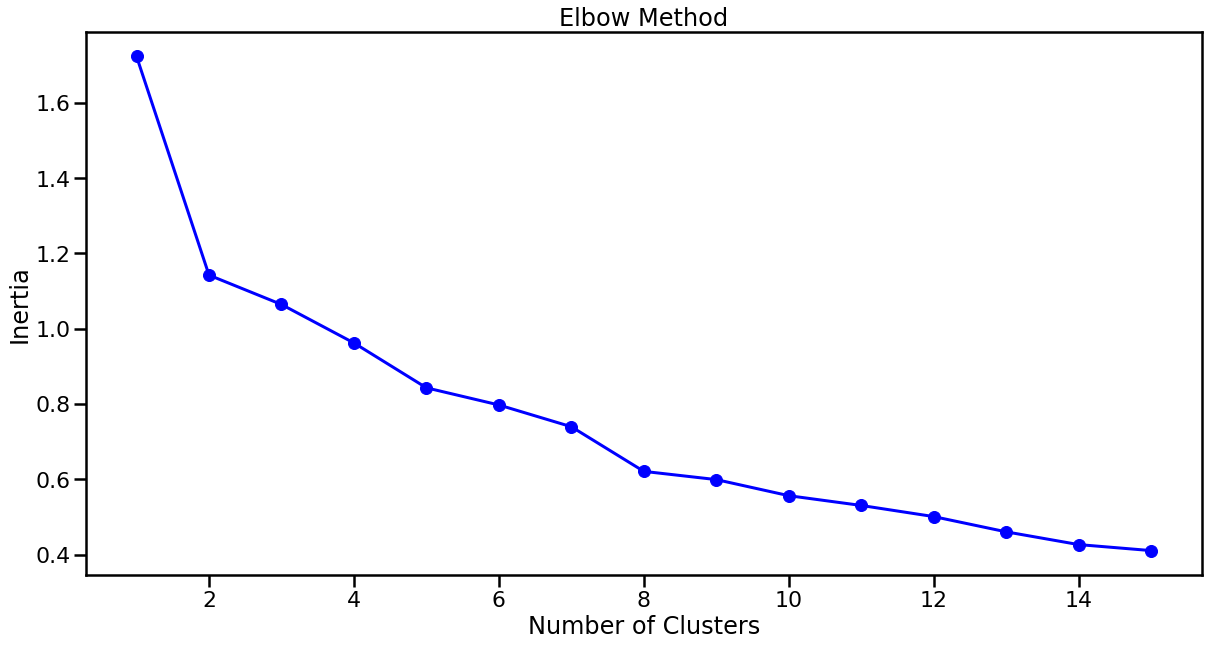

'Silhouette score shows k= 2'

In [84]:
# elbow method on standrized prices in order to catch the series that similar in pattern 
elbow_method(norm_input_data,15,'dtw')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1.187 --> 0.931 --> 

[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.901 --> 0.889 --> 

[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.883 --> 0.877 --> 

[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.871 --> 0.859 --> 

[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.843 --> 0.843 --> 


[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.0s finished


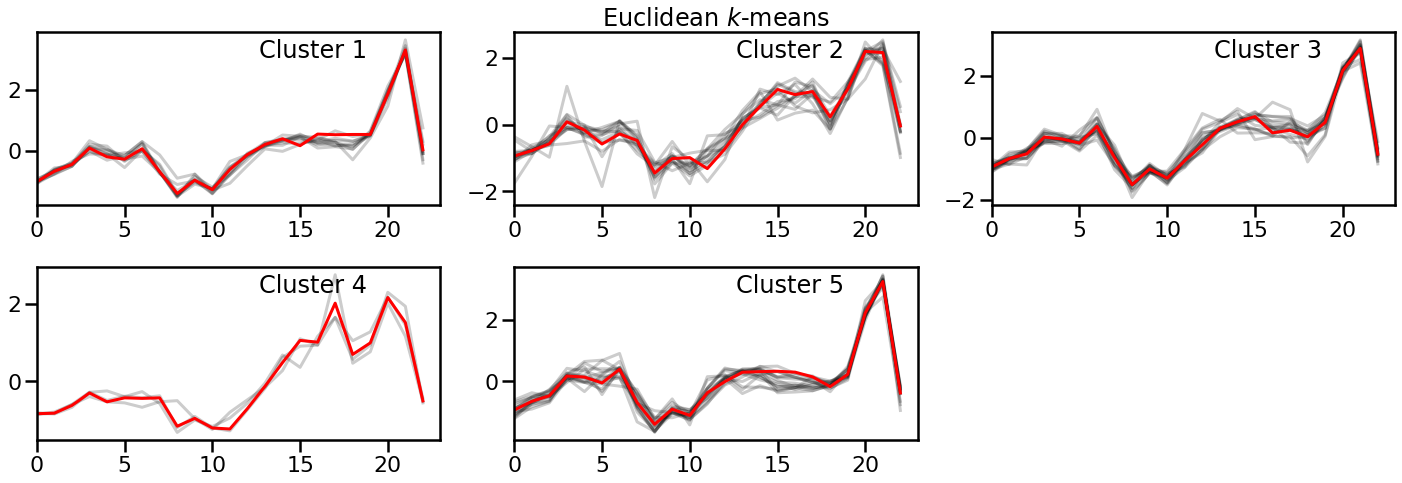

array([4, 2, 1, 0, 0, 1, 3, 1, 1, 3, 2, 3, 1, 2, 2, 1, 2, 0, 2, 1, 1, 2,
       0, 2, 2, 1, 2, 2, 0, 4, 2, 4, 2, 1, 2, 2, 2, 1, 0, 0, 4, 4, 4, 0,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1], dtype=int64)

In [85]:

pred_norm=plot_time_series_clusters(norm_input_data, 5,'dtw')
pred_norm

In [86]:
Bexar_county=annual_average.T.reset_index()
Bexar_county['cluster_normalizedprices']=pred_norm

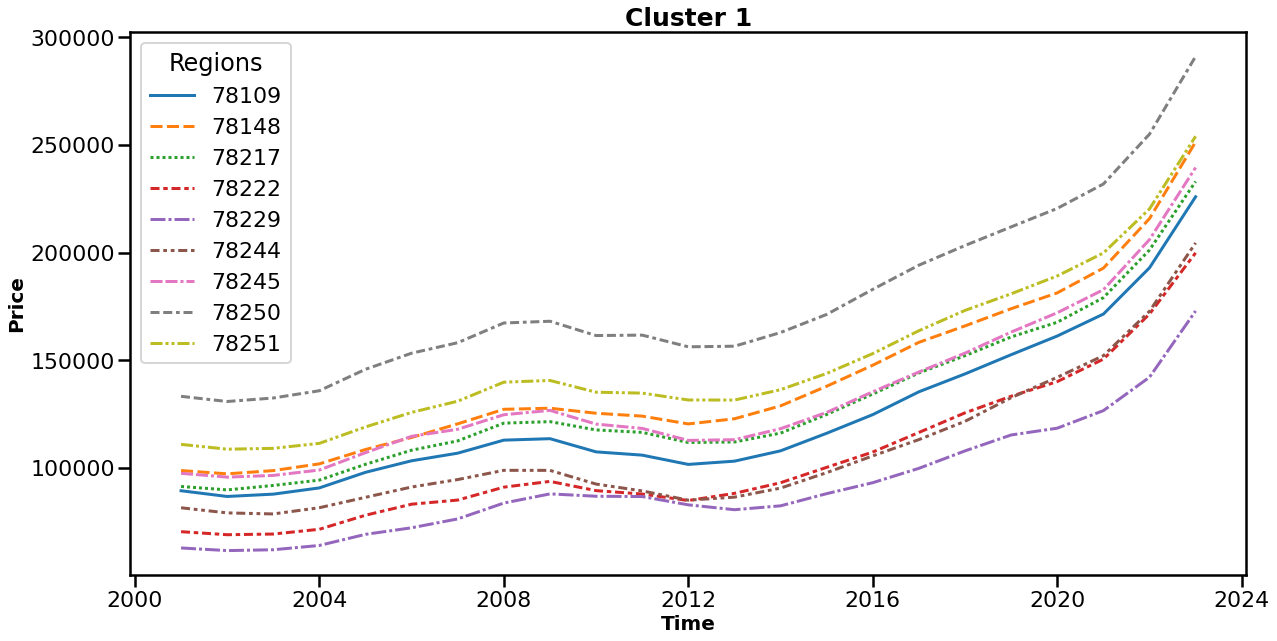

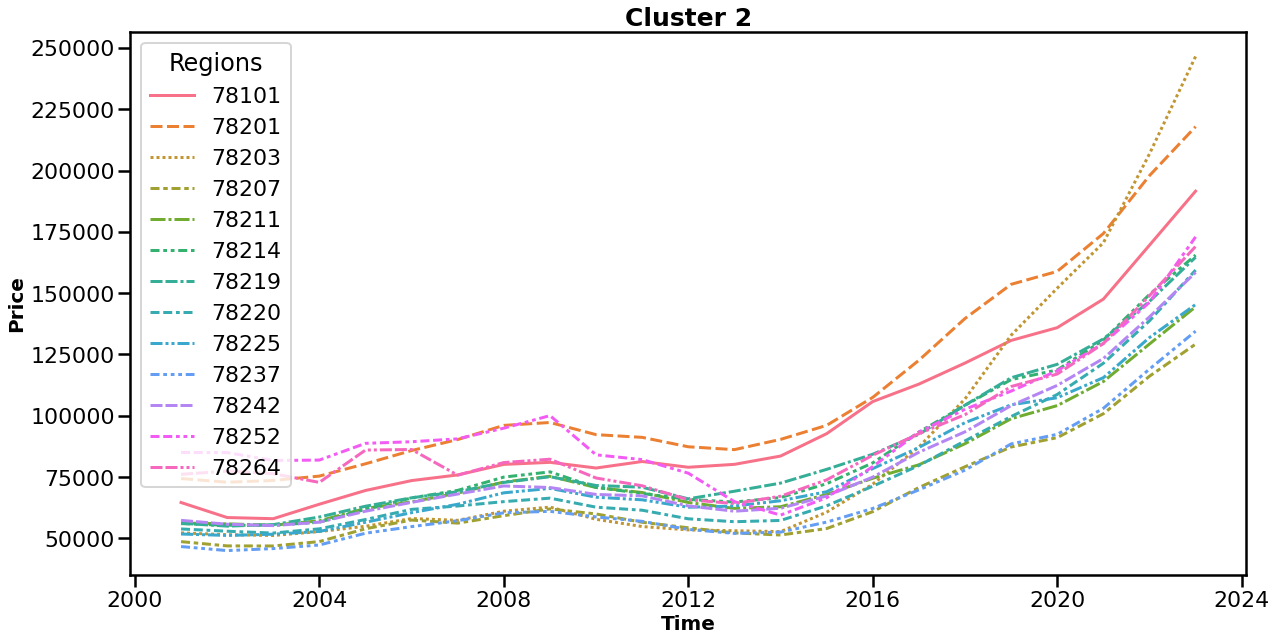

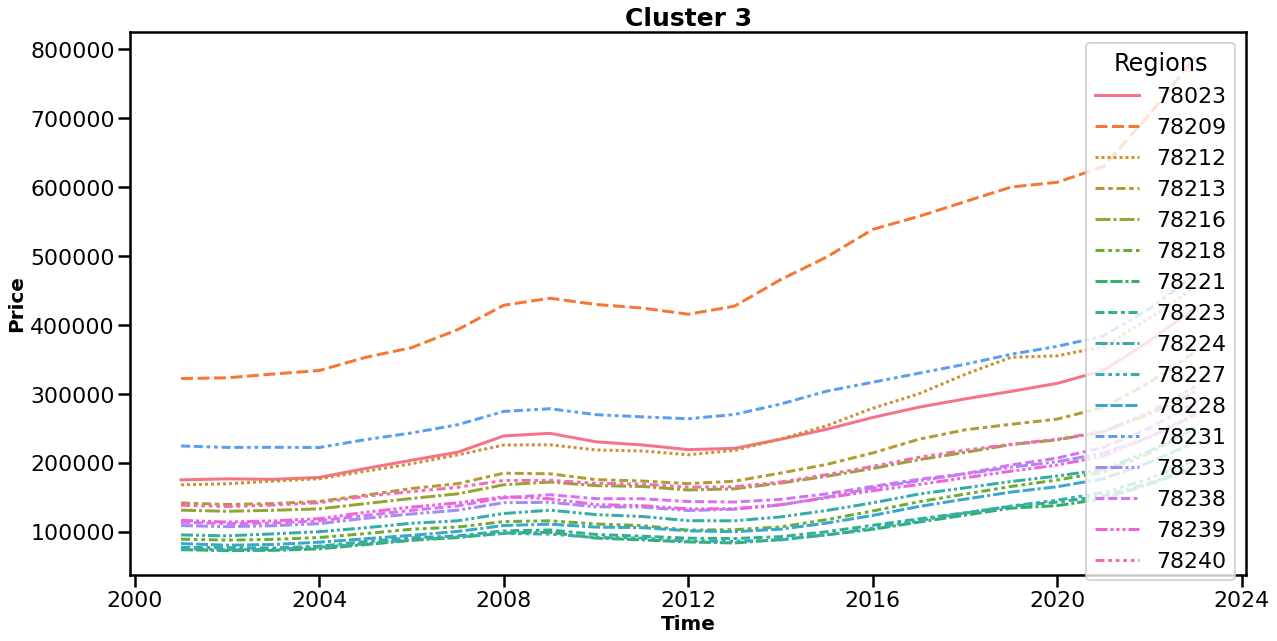

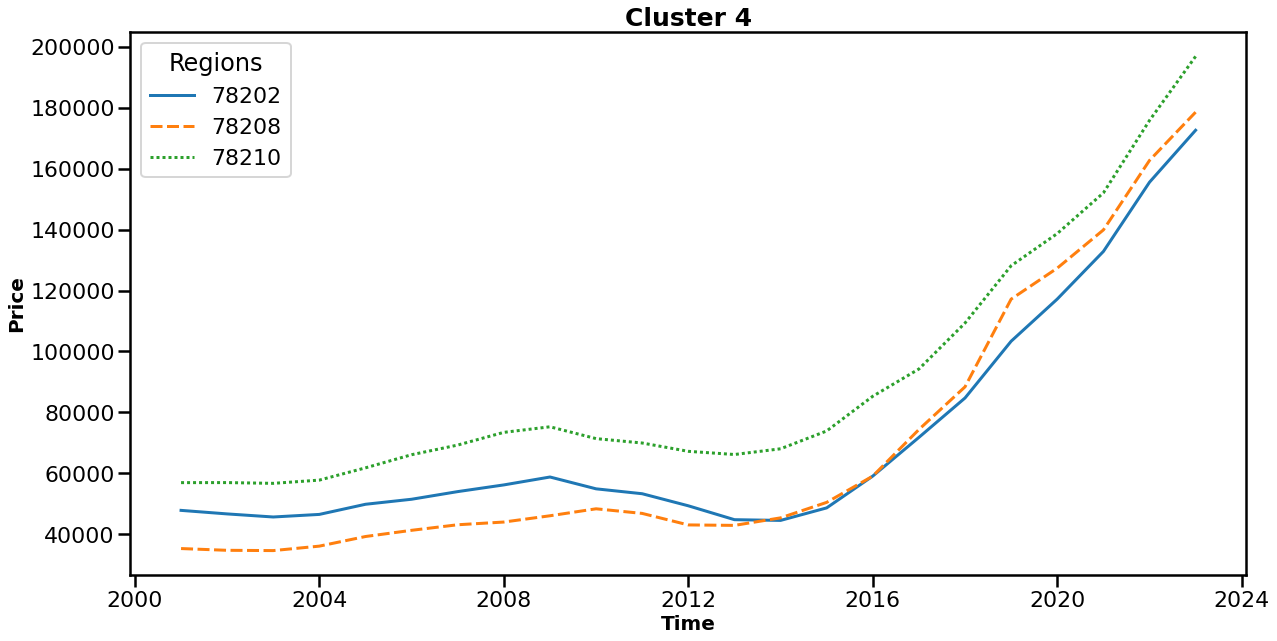

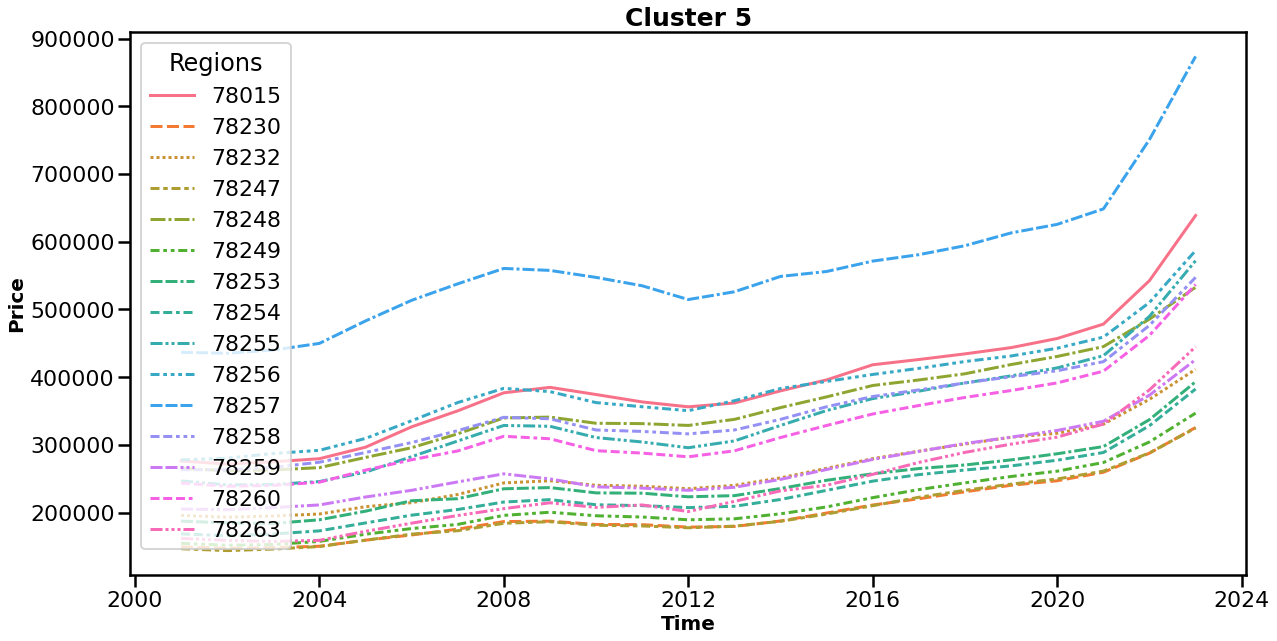

In [87]:
for i in [0,1,2,3,4]:
    plt.figure()
    sns_plot=Bexar_county[Bexar_county['cluster_normalizedprices']==i].set_index('index').rename_axis('Regions').T.iloc[:-2,:]
    ax=sns.lineplot(data=sns_plot)
    ax.set_title(f'Cluster {i+1}',fontsize=25, fontweight="bold")
    ax.set_xlabel('Time',fontsize=20, fontweight="bold")
    ax.set_ylabel('Price',fontsize=20, fontweight="bold")
    plt.show()

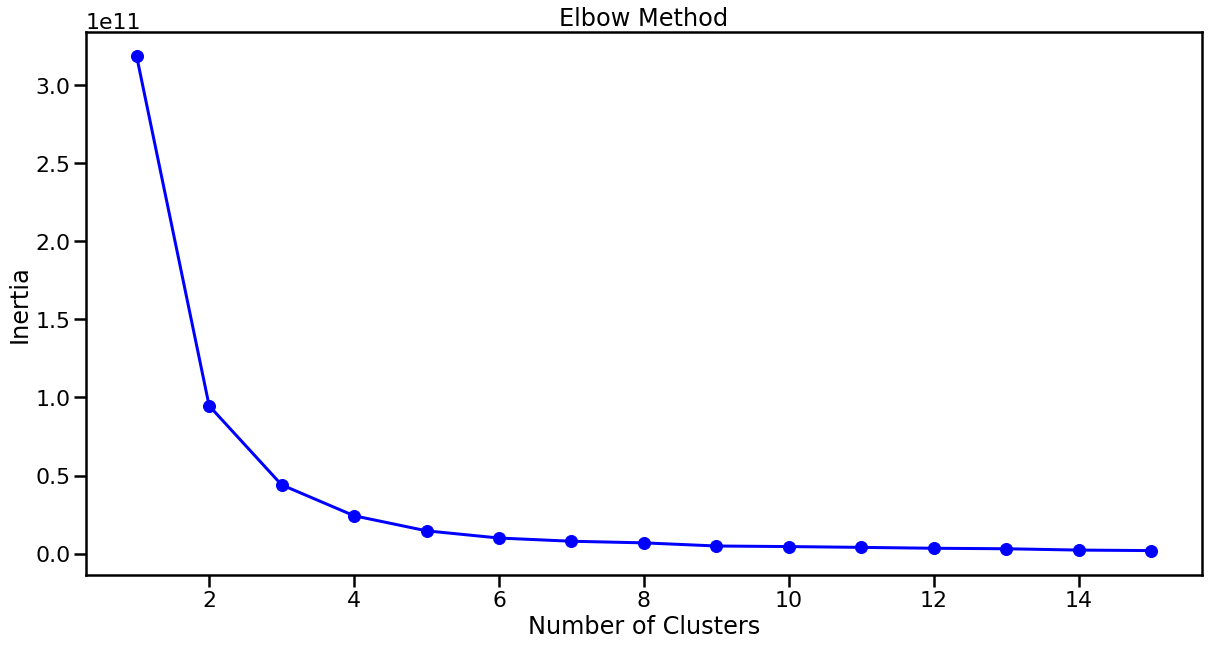

'Silhouette score shows k= 2'

In [88]:
# elbow method on real prices to cluster the time series based on the price. 
elbow_method(real_price_data,15,'euclidean')


174410282048.087 --> 107209099918.447 --> 104164293532.118 --> 99539982901.871 --> 95659469200.850 --> 95104092321.973 --> 94660505537.825 --> 94660505537.825 --> 


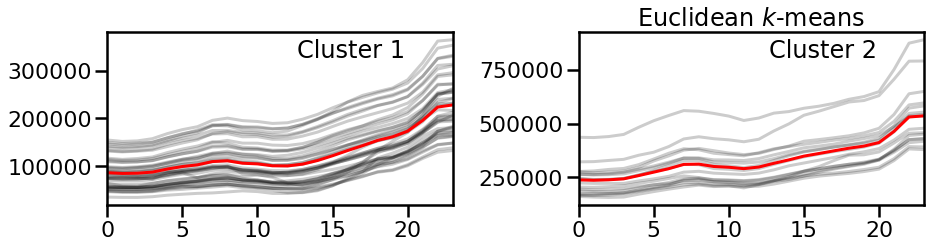

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [89]:
pred_real=plot_time_series_clusters(real_price_data.values, 2,'euclidean')
pred_real

In [90]:
# sabe the values 
Bexar_county['cluster_realprices']=pred_real


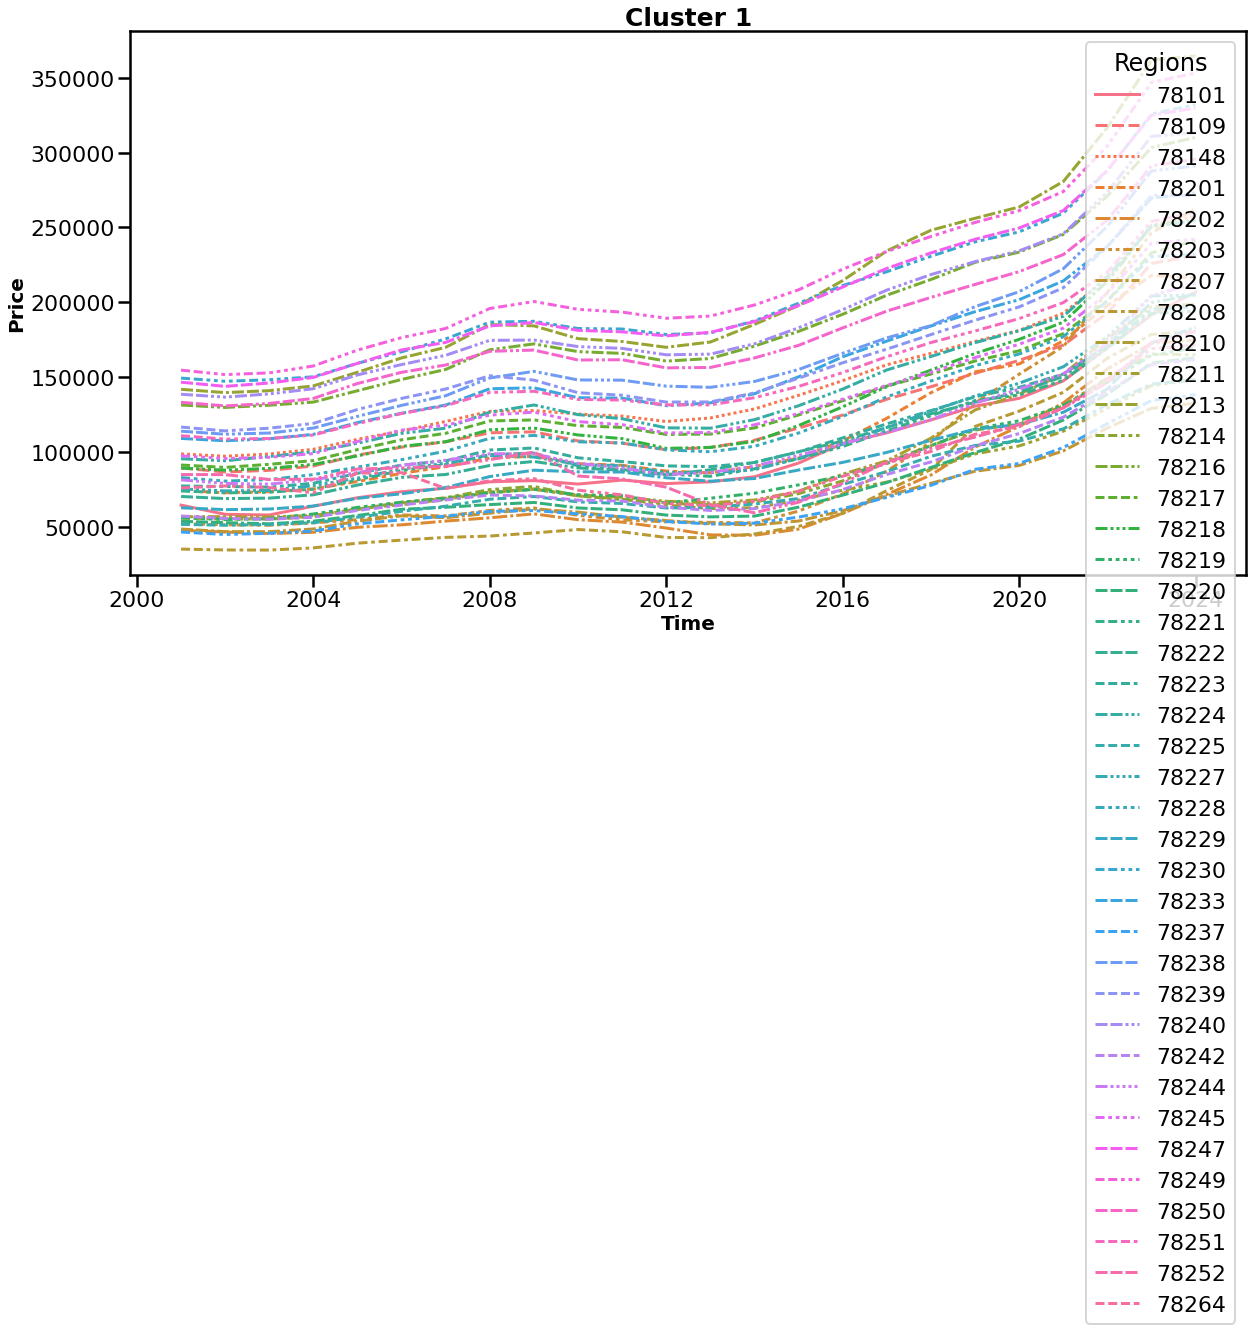

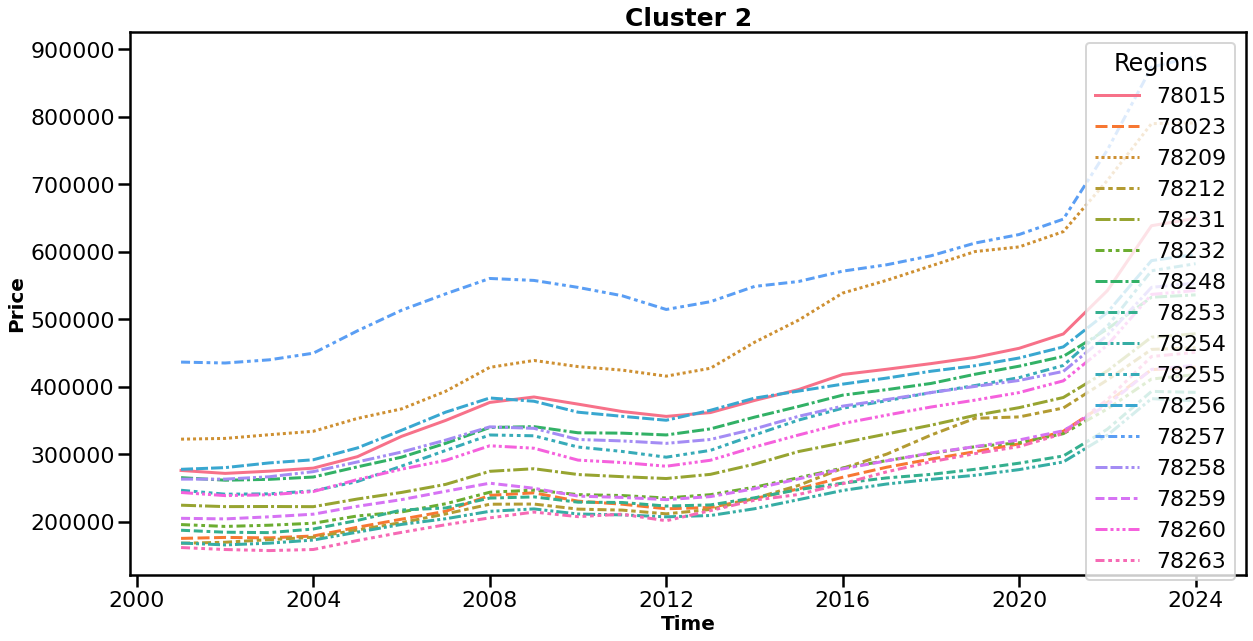

In [91]:

for i in [0,1]:
    plt.figure()
    sns_plot=Bexar_county[Bexar_county['cluster_realprices']==i].set_index('index').rename_axis('Regions').T.iloc[:-2,:]
    ax=sns.lineplot(data=sns_plot)
    ax.set_title(f"Cluster {i+1}",fontsize=25, fontweight="bold")
    ax.set_xlabel('Time',fontsize=20, fontweight="bold")
    ax.set_ylabel('Price',fontsize=20, fontweight="bold")
    plt.show()

In [92]:
Bexar_county_melt.isna().sum()

cluster_realprices          0
cluster_normalizedprices    0
Region                      0
datatime                    0
price                       0
State                       0
County                      0
Location                    0
dtype: int64

In [93]:
Bexar_county_melt=Bexar_county.melt(id_vars=['cluster_realprices','cluster_normalizedprices','index'])
Bexar_county_melt.columns=[
 
 'cluster_realprices',
 'cluster_normalizedprices',
 'Region',
 'datatime',
 'price']
Bexar_county_melt['State']='Texas'
Bexar_county_melt['County']='Bexar County'
Bexar_county_melt['Location']=f"Bexar County,Texas"

Bexar_county_melt.head(2)


cluster_realprices  cluster_normalizedprices  Region   datatime  \
0                   1                         4   78015 2000-12-31   
1                   1                         2   78023 2000-12-31   

           price  State        County            Location  
0  276124.178732  Texas  Bexar County  Bexar County,Texas  
1  175468.366465  Texas  Bexar County  Bexar County,Texas

In [105]:
Bexar_county_melt.to_csv('Bexar_county_zip_clusters.csv')